In [1]:
# 3.6 quantum kernel based svm
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi
import matplotlib.pyplot as plt
from sklearn import svm

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# define quantum kernels
def qckernel(x,y):
    
    n=len(x)
    qr=QuantumRegister(n,'q')
    cr=ClassicalRegister(n,'c')

    circuit = QuantumCircuit(qr,cr)
    for i in range(n):
        circuit.ry(pi*x[i],i)
        circuit.ry(-pi*y[i],i)
    circuit.measure(range(n),range(n))
    
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend, shots=nshots)
    result = job.result()
    counts = result.get_counts(circuit)
    zerostr=format(0,'0'+str(n)+'b')    
    try:
        p=(counts[zerostr])/nshots
    except:
        p=0.
    
    return p


def qckernelmat(Xmat,Ymat):
    (n_samples,n_features)=Xmat.shape
    n_predict=Ymat.shape[0]
    Kmat=np.zeros((n_samples,n_predict))
    for i in range(n_samples):
        for j in range(n_predict):
            Kmat[i,j]=qckernel(Xmat[i,:],Ymat[j,:])
    return Kmat

In [3]:
# number of shots for quantum simulator
nshots=100

# generate some data
ndata=8

# make data
Y = [-1] * int(ndata/2) + [1] * int(ndata/2)

X=0.5*np.ones((ndata,2))
X[int(ndata/2):]=-X[int(ndata/2):]
X=X+1.0*(np.random.rand(ndata,2)-0.5)

print('X=',X)
print('Y=',Y)

# learning
clf = svm.SVC(kernel=qckernelmat)
clf.fit(X, Y)



X= [[ 0.40867651  0.58903694]
 [ 0.87821081  0.59657006]
 [ 0.53323543  0.45718951]
 [ 0.11282755  0.69731586]
 [-0.37352051 -0.97168903]
 [-0.32267157 -0.44386583]
 [-0.01651035 -0.47165848]
 [-0.74845499 -0.18133856]]
Y= [-1, -1, -1, -1, 1, 1, 1, 1]


SVC(kernel=<function qckernelmat at 0x7ff77e100310>)

In [4]:
# calculate decision boundary
x_min = -1.
x_max = 1.
y_min = -1.
y_max = 1.

XX, YY = np.mgrid[x_min:x_max:10j, y_min:y_max:10j]
Z = clf.decision_function(np.c_[XX.flatten(), YY.flatten()])


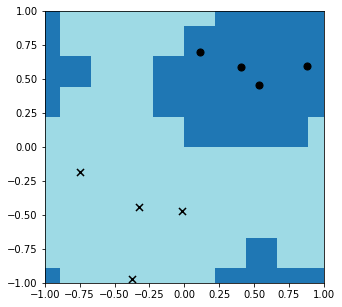

In [5]:
# plot the result
plt.figure(figsize=(5,5))

Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap='tab20', shading='auto')

plt.scatter(X[:int(ndata/2), 0], X[:int(ndata/2), 1], c='k', marker='o', s=50)
plt.scatter(X[int(ndata/2):, 0], X[int(ndata/2):, 1], c='k', marker='x', s=50)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()
